In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def exibe_image(img, gray=True):
    
    if gray:
        plt.imshow(img, cmap = 'gray')
    else:
        plt.imshow(img)
    
    plt.axis('off')
    plt.show()

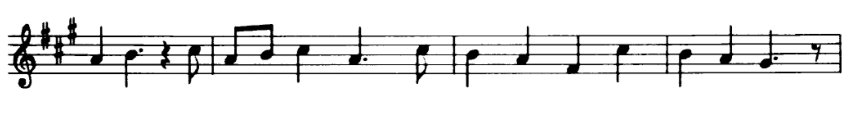

In [9]:
# passo 1: abrir a imagem

img = cv2.imread('sheet.png')

plt.figure(figsize=(15,15))
exibe_image(img)

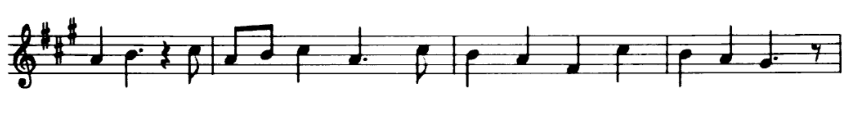

In [10]:
# passo 2: converter para escala de cinza

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
exibe_image(img_gray)

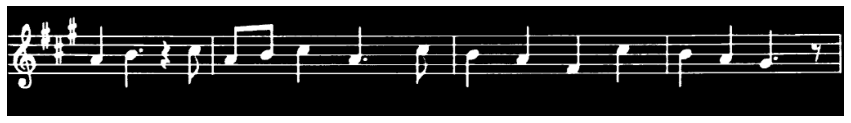

In [11]:
# passo 3: converter para imagem binária

img_gray = cv2.bitwise_not(img_gray)

plt.figure(figsize=(15,15))
exibe_image(img_gray)


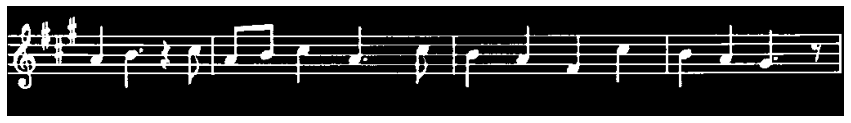

In [12]:
img_binary = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

plt.figure(figsize=(15,15))
exibe_image(img_binary)

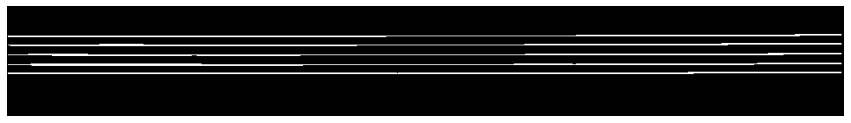

In [13]:
horizontal = np.copy(img_binary)

cols = horizontal.shape[1]

horizontal_size = cols//20

horizontal_size = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

horizontal = cv2.erode(horizontal, horizontal_size)
horizontal = cv2.dilate(horizontal, horizontal_size)

plt.figure(figsize=(15, 15))
exibe_image(horizontal)


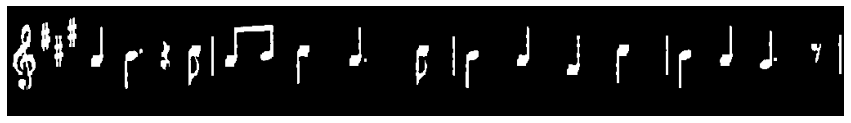

In [15]:
vertical = np.copy(img_binary)

rows = vertical.shape[0]

vertical_size = rows//30

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

vertical = cv2.erode(vertical, vertical_kernel)
vertical = cv2.dilate(vertical, vertical_kernel)

plt.figure(figsize=(15, 15))
exibe_image(vertical)

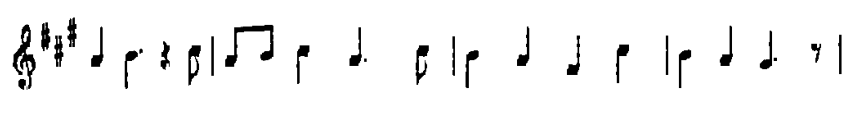

In [16]:
vertical = cv2.bitwise_not(vertical)

plt.figure(figsize=(15,15))
exibe_image(vertical)

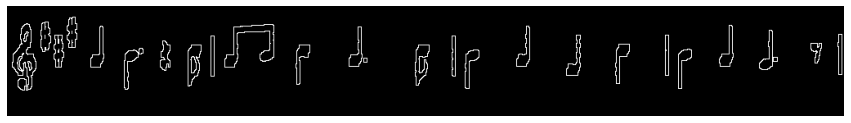

In [17]:
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)

plt.figure(figsize=(15,15))
exibe_image(edges)

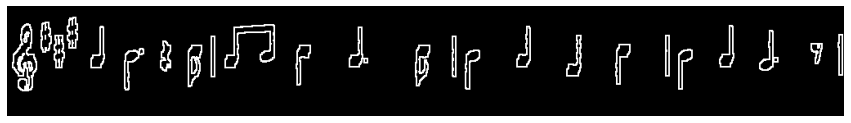

In [18]:
kernel = np.ones((2,2), np.uint8)
edges = cv2.dilate(edges, kernel)

plt.figure(figsize=(15,15))
exibe_image(edges)

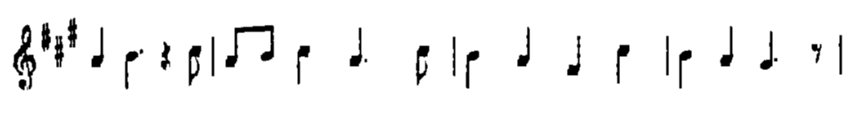

In [19]:
smooth = np.copy(vertical)

smooth = cv2.blur(smooth, (2,2))

(rows, cols) = np.where(edges != 0)

vertical[rows, cols] = smooth[rows, cols]

plt.figure(figsize=(15, 15))
exibe_image(vertical)